# Ejemplo

<h3>Maximizar la función:

$$ min \hspace{0.25cm} f(x,y) = xy^2$$

sujeto a:

$$ h(x,y) = x^2+y^2 -1 = 0 $$

In [7]:
# importación de librerias
import sympy as sp # calculo simbolico
import numpy as np # manejo de matrices y vectores númericos
from IPython.display import display # imprimir expresiones matemáticas
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib widget

In [8]:
# definir variables simbolicas
x, y, lambda_ = sp.symbols('x, y, lambda')

In [9]:
f = x*y**2 # función objetivo
f

x*y**2

In [10]:
h = x**2 + y**2 - 1 # restricción
h

x**2 + y**2 - 1

## Condiciones de primer orden

Definir la función lagrangiana para incorporar la restrición con un multiplicador de Lagrange $\lambda$:

<h3> $$ \mathcal{L}(x,y,\lambda) =  xy^2 + \lambda (x^2+y^2 -1)$$

In [11]:
L = f  + lambda_ * h # lagrangiano
L

lambda*(x**2 + y**2 - 1) + x*y**2

Luego se calculan las derivadas parciales de primer orden de la función Lagrangiana

<h3>$\frac{\partial \mathcal{L}}{\partial x} = 0;\hspace{1cm} \frac{\partial \mathcal{L}}{\partial y} = 0;\hspace{1cm} \frac{\partial \mathcal{L}}{\partial \lambda} = 0$

In [12]:
# derivadas parciales de la función Lagrangiana
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlambda = sp.diff(L, lambda_)

# imprimir las expresiones
display(dL_dx)
display(dL_dy)
display(dL_dlambda)

2*lambda*x + y**2

2*lambda*y + 2*x*y

x**2 + y**2 - 1

<h3>El resultado es un sistema de 3 ecuaciones y 3 incognitas. Se procede a resolver el sistema de ecuaciones

In [13]:
# Resolver el sistema de ecuaciones
sol = sp.solve([dL_dx, dL_dy, dL_dlambda], (x, y, lambda_), dict = True)

x_optimal = np.zeros([len(sol),3]) # definimos esta matriz para obtener los valores númericos

print(f' número de soluciones obtenidas = {len(sol)}')

 número de soluciones obtenidas = 6


In [14]:
print('Soluciones formato simbolico')
for i in range(len(sol)):
    print(f"x = {sol[i][x]}, y = {sol[i][y]}, lambda = {sol[i][lambda_]}")
    x_optimal[i,0] = round(float(sol[i][x]), 3)
    x_optimal[i,1] = round(float(sol[i][y]), 3)
    x_optimal[i,2] = round(float(sol[i][lambda_]), 3)

Soluciones formato simbolico
x = -1, y = 0, lambda = 0
x = 1, y = 0, lambda = 0
x = sqrt(3)/3, y = -sqrt(6)/3, lambda = -sqrt(3)/3
x = sqrt(3)/3, y = sqrt(6)/3, lambda = -sqrt(3)/3
x = -sqrt(3)/3, y = -sqrt(6)/3, lambda = sqrt(3)/3
x = -sqrt(3)/3, y = sqrt(6)/3, lambda = sqrt(3)/3


In [15]:
print('Soluciones formato flotante')
print(x_optimal)

Soluciones formato flotante
[[-1.     0.     0.   ]
 [ 1.     0.     0.   ]
 [ 0.577 -0.816 -0.577]
 [ 0.577  0.816 -0.577]
 [-0.577 -0.816  0.577]
 [-0.577  0.816  0.577]]


## Condiciones de segundo orden.

Matriz Hessiana del Lagrangiano

<h3>$H = \begin{bmatrix}
    \frac{\partial^2 \mathcal{L}}{\partial x^2} & \frac{\partial^2 \mathcal{L}}{\partial x \partial y} \\
    \frac{\partial^2 \mathcal{L}}{\partial y \partial x} & \frac{\partial^2 \mathcal{L}}{\partial y^2}
\end{bmatrix}$

In [16]:
# Creamos la matriz hessiana
dL2_dx2 = sp.diff(dL_dx, x)
dL2_dxdy = sp.diff(dL_dx, y)
dL2_dydx = sp.diff(dL_dy, x)
dL2_dy2 = sp.diff(dL_dy, y)

H = sp.Matrix([[dL2_dx2, dL2_dxdy],[dL2_dydx, dL2_dy2]])
display(H)

Matrix([
[2*lambda,            2*y],
[     2*y, 2*lambda + 2*x]])

<h3>Se calcula el gradiente de la restricción $\nabla h$

In [17]:
dh = sp.Matrix([sp.diff(h,x), sp.diff(h,y)])
dh

Matrix([
[2*x],
[2*y]])

<h3> Se define el vector $\vec{v}$

In [18]:
v1, v2 = sp.symbols('v1, v2')

v = sp.Matrix([v1, v2])
v

Matrix([
[v1],
[v2]])

<h3>Aplicar la condición que para todo $\vec{v} \in R \neq 0$

$$ \nabla h(x^{*})^{T}\cdot\vec{v} = 0 $$

In [19]:
dh.T*v

Matrix([[2*v1*x + 2*v2*y]])

In [20]:
v2_expression = sp.solve(dh.T*v, v2) # resolvemos la ecuacion igualada a 0 y pedimos que encuentre la expresión de v2
v2_expression

{v2: -v1*x/y}

Definimos el producto $\nabla h(x^{*})^{T}\cdot\vec{v}$ solo en función de $v_1$

In [21]:
dhv = sp.Matrix([v1, -v1*x/y])
dhv

Matrix([
[     v1],
[-v1*x/y]])

Se debe cumplir que para todo $\vec{v} \in R$:
   
$\vec{v}^{T}\cdot H(x^{*},\lambda^{*})\cdot \vec{v} > 0 $ Entonces $x^*$ es un mínimo local    
$\vec{v}^{T}\cdot H(x^{*},\lambda^{*})\cdot \vec{v} < 0 $ Entonces $x^*$ es un mínimo local    

In [22]:
sec_cond = dhv.T*H*dhv
sec_cond

Matrix([[-v1*x*(-v1*x*(2*lambda + 2*x)/y + 2*v1*y)/y + v1*(2*lambda*v1 - 2*v1*x)]])

<h3>Ahora debemos evaluar la expresión obtenida para los puntos críticos $x^*$ obtenidos de la condición de primer orden

In [23]:
# solución 1 id=2
sec_cond.subs([(x, x_optimal[2,0]), (y, x_optimal[2,1]), (lambda_, x_optimal[2,2])])

Matrix([[-3.462*v1**2]])

Se cumple que para todo $v \in R$ la expresión es menor a 0, por lo tanto es un máximo local

In [24]:
# solución 2 id=3
sec_cond.subs([(x, x_optimal[3,0]), (y, x_optimal[3,1]), (lambda_, x_optimal[3,2])])

Matrix([[-3.462*v1**2]])

Se cumple que para todo $v \in R$ la expresión es menor a 0, por lo tanto es un máximo local

In [25]:
# solución 3 id=4
sec_cond.subs([(x, x_optimal[4,0]), (y, x_optimal[4,1]), (lambda_, x_optimal[4,2])])

Matrix([[3.462*v1**2]])

Se cumple que para todo $v \in R$ la expresión es mayor a 0, por lo tanto es un mínimo local

In [26]:
# solución 4 id=5
sec_cond.subs([(x, x_optimal[5,0]), (y, x_optimal[5,1]), (lambda_, x_optimal[5,2])])

Matrix([[3.462*v1**2]])

Se cumple que para todo $v \in R$ la expresión es mayor a 0, por lo tanto es un mínimo local

## Solución Gráfica

In [27]:
# creamos malla de puntos x e y
x = np.linspace(-1,1, 50)
y = x
X, Y = np.meshgrid(x,y)

In [28]:
# definimos la función de costo como una función de python
def fcost(x,y):
    return x*y**2

In [29]:
# definimos esta función para que evalue la función de costo para cada punto de la malla. Lo mismo para la restricción 
def mesh(X, Y):
    
    n_rows, n_columns = X.shape
    Z = np.zeros([n_rows, n_columns])
    C = np.zeros([n_rows, n_columns])
    D = np.zeros([n_rows, n_columns])
    for i in range(n_rows):
        for j in range(n_columns):
            Z[i,j] = fcost(X[i,j], Y[i,j])
            C[i,j] = (1-X[i,j]**2)**0.5
            D[i,j] = -(1-X[i,j]**2)**0.5
            
    return Z,C,D

In [30]:
Z, C, D  = mesh(X, Y)
# calculamos la función de costo en los primeros dos x* (máximos)
z_opt1 = fcost(x_optimal[2,0], x_optimal[2, 1])
z_opt2 = fcost(x_optimal[3,0], x_optimal[3, 1])

[Text(-1.0, 0, '-1.0'),
 Text(-0.5, 0, '-0.5'),
 Text(0.0, 0, '0.0'),
 Text(0.5, 0, '0.5'),
 Text(1.0, 0, '1.0')]

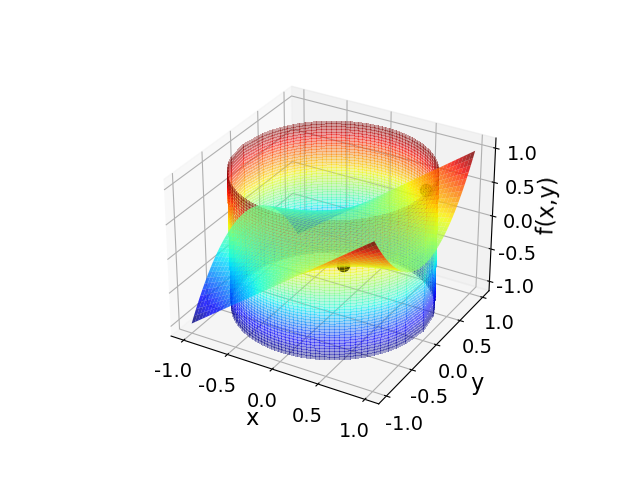

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap = cm.jet, linewidth = 0, antialiased = True, alpha = 0.8)
surf = ax.plot_surface(X, C, Y, cmap = cm.jet, linewidth = 0, antialiased = False, alpha = 0.35, rstride = 1, cstride = 1)
surf = ax.plot_surface(X, D, Y, cmap = cm.jet, linewidth = 0, antialiased = False, alpha = 0.35, rstride = 1, cstride = 1)
ax.scatter(x_optimal[2,0], x_optimal[2,1], z_opt1, s = 75, color = 'k')
ax.scatter(x_optimal[3,0], x_optimal[3,1], z_opt2, s = 75, color = 'k')

ticks = np.linspace(-1.0,1.0, 5)
ax.set_xlabel(xlabel = ' x', fontsize = 16)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks, fontsize = 14)
ax.set_ylabel(ylabel = ' y', fontsize = 16)
ax.set_yticks(ticks)
ax.set_yticklabels(ticks, fontsize = 14)
ax.set_zlabel(zlabel = ' f(x,y)', fontsize = 16)
ax.set_zticks(ticks)
ax.set_zticklabels(ticks, fontsize = 14)

[Text(0, -1.0, '-1.0'),
 Text(0, -0.5, '-0.5'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.5, '0.5'),
 Text(0, 1.0, '1.0')]

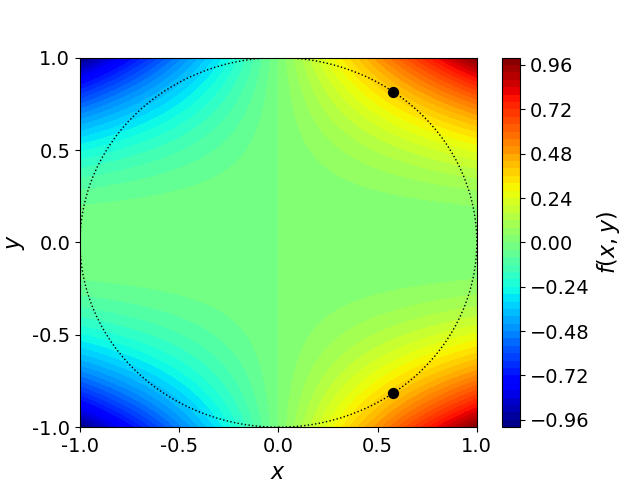

In [32]:
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=50, cmap='jet')
cbar=fig.colorbar(contour, ax=ax)
cbar.set_label('$f(x,y)$', fontsize = 16)
cbar.ax.tick_params(labelsize = 14)

# Agrega el círculo unitario para indicar la restricción
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle = ':')
ax.add_artist(circle)
ax.scatter(x_optimal[2,0], x_optimal[2,1], s = 50, color = 'k')
ax.scatter(x_optimal[3,0], x_optimal[3,1], s = 50, color = 'k')
ax.set_xlabel('$x$', fontsize = 16)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks, fontsize = 14)
ax.set_ylabel('$y$', fontsize = 16)
ax.set_yticks(ticks)
ax.set_yticklabels(ticks, fontsize = 14)
